In [34]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf

import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [35]:
df_pre = pd.read_csv('data/iris.csv', header=None)
df = df_pre.sample(frac=1)
print(df.head())
print(df.info())

       0    1    2    3                4
114  5.8  2.8  5.1  2.4   Iris-virginica
62   6.0  2.2  4.0  1.0  Iris-versicolor
33   5.5  4.2  1.4  0.2      Iris-setosa
107  7.3  2.9  6.3  1.8   Iris-virginica
7    5.0  3.4  1.5  0.2      Iris-setosa
<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 114 to 47
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None


In [36]:
dataset = df.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

In [37]:
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(Y)
Y = e.transform(Y)
Y_encoded = tf.keras.utils.to_categorical(Y) # 카테고리 데이터

In [38]:
model = Sequential()
model.add(Dense(48, input_dim=4, activation='relu'))

model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [40]:

# 모델 저장 폴더 설정
MODEL_DIR = 'model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
# 모델 저장 조건 설정
modelpath="model/{epoch:02d}-{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1,save_best_only=True)
# 모델 실행 및 저장
# history = model.fit(x_train, y_train, validation_split=0.2, epochs=2000, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])
# # history = model.fit(x_train, y_train, validation_split=0.2, epochs=2000, batch_size=200)

history = model.fit(X, Y_encoded, validation_split=0.33, epochs=3500, batch_size=50, callbacks=[early_stopping_callback, checkpointer])


Epoch 1/3500
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.4000 - loss: 1.4729
Epoch 1: val_loss improved from inf to 1.40728, saving model to model/01-1.4073.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.3400 - loss: 1.4898 - val_accuracy: 0.3800 - val_loss: 1.4073
Epoch 2/3500
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4000 - loss: 1.3756
Epoch 2: val_loss improved from 1.40728 to 1.32453, saving model to model/02-1.3245.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3400 - loss: 1.3805 - val_accuracy: 0.3600 - val_loss: 1.3245
Epoch 3/3500
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3800 - loss: 1.2990
Epoch 3: val_loss improved from 1.32453 to 1.26154, saving model to model/03-1.2615.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3200 - loss: 1.2929 - val_accuracy: 0.1600 - val_loss: 1.2615
Epoch 4/3500
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2000 - loss: 1.2412
Epoch 4: val_loss improved from 1.26154 to 1.21556, sa

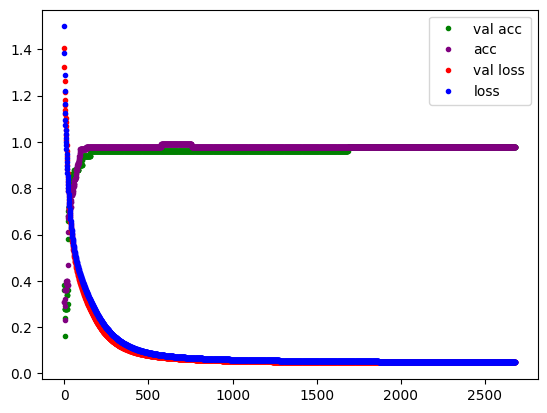

In [41]:
y_vacc=history.history['val_accuracy']
# y_acc에 학습으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy'] # x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시

#y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']
# y_acc에 학습으로 측정한 정확도의 값을 저장
y_loss=history.history['loss'] # x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, "o", c="green", markersize=3, label='val acc')
plt.plot(x_len, y_acc, "o", c="purple", markersize=3, label='acc')
plt.plot(x_len, y_vloss, "o", c="red", markersize=3, label='val loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=3, label='loss')
plt.legend()
plt.show()

- csv 보면 정렬이 되어서, 카테고리 1,2에 대해서만 훈련해서 카테고리 3에 대한 학습이 이루어지지 않는다.
- 처음에 샘플링을 꼭 해야 하는 이유를 알 수 있다.